# Surprise Housing data analysis

In [467]:
# Import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
import os
import time
import warnings
warnings.filterwarnings('ignore')

In [468]:
#import the data
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [469]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

##### 1. Understanding the Data

##### 1.1 MSSubClass

In [470]:
data['MSSubClass'].astype('category').value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

###### Most of the property dwellings are -1) 1-STORY 1946 & NEWER ALL STYLES, 2) 2-STORY 1946 & NEWER, 3) 1-1/2 STORY FINISHED ALL AGES

##### 1.2 MSZoning

In [471]:
data['MSZoning'].astype('category').value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

###### Zoning types - the most ones are of 'Residential Low Density' then 'Residential Medium Density' and least one is 'Commercial' and 'Residential High Density'

##### 1.3 Neighborhood

In [472]:
data['Neighborhood'].astype('category').value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

###### The most of the properties are near to North Ames and College Creek

##### 1.5 Building type

In [473]:
data['BldgType'].astype('category').value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

###### The type of property available for sale is mostly Single-family Detached

##### 1.6 Sale type

In [474]:
data['SaleType'].astype('category').value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

###### The majority of property available for sale is Warranty Deed - Conventional

##### 1.7 Sale Condition

In [475]:
data['SaleCondition'].astype('category').value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

######  Most prperties are for sale because of normal conditions

##### 1.8 LotArea

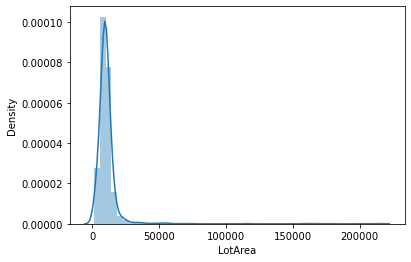

In [476]:
sns.distplot(data['LotArea'])
plt.show()

##### 1.9 Year built

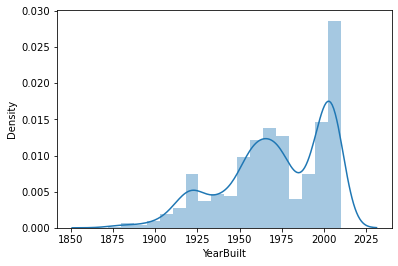

In [477]:
sns.distplot(data['YearBuilt'])
plt.show()

##### 1.11 Year Sold

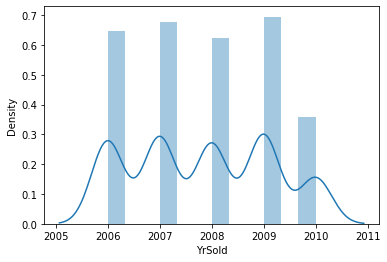

In [478]:
sns.distplot(data['YrSold'])
plt.show()

##### 1.10 Month sold

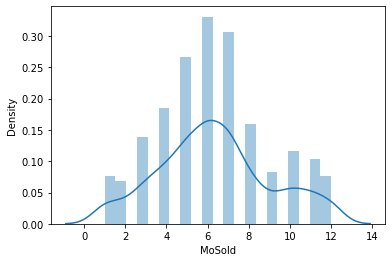

In [479]:
sns.distplot(data['MoSold'])
plt.show()

##### 2. Data Exploration

###### To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*. Let's see whether that's true in this case.


We'll first subset the list of all (independent) numeric variables, and then make a **pairwise plot**.

In [480]:
# all numeric (float and int) variables in the dataset
data_num = data.select_dtypes(include=['float64', 'int64'])
data_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [481]:
data_num.drop(['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MoSold', 'YrSold'], axis=1, inplace = True)

In [482]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   YearBuilt      1460 non-null   int64  
 4   MasVnrArea     1452 non-null   float64
 5   BsmtFinSF1     1460 non-null   int64  
 6   BsmtFinSF2     1460 non-null   int64  
 7   BsmtUnfSF      1460 non-null   int64  
 8   TotalBsmtSF    1460 non-null   int64  
 9   1stFlrSF       1460 non-null   int64  
 10  2ndFlrSF       1460 non-null   int64  
 11  LowQualFinSF   1460 non-null   int64  
 12  GrLivArea      1460 non-null   int64  
 13  BsmtFullBath   1460 non-null   int64  
 14  BsmtHalfBath   1460 non-null   int64  
 15  FullBath       1460 non-null   int64  
 16  HalfBath       1460 non-null   int64  
 17  BedroomAbvGr   1460 non-null   int64  
 18  KitchenA

In [483]:
# only selecting the non categorical variables from the data_num
data_numeric = data_num[['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']]

In [484]:
data_numeric

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,0,250000
5,85.0,14115,0.0,732,0,64,796,796,566,0,1362,480,40,30,0,320,0,0,700,143000
6,75.0,10084,186.0,1369,0,317,1686,1694,0,0,1694,636,255,57,0,0,0,0,0,307000
7,NaN,10382,240.0,859,32,216,1107,1107,983,0,2090,484,235,204,228,0,0,0,350,200000
8,51.0,6120,0.0,0,0,952,952,1022,752,0,1774,468,90,0,205,0,0,0,0,129900
9,50.0,7420,0.0,851,0,140,991,1077,0,0,1077,205,0,4,0,0,0,0,0,118000


In [485]:
# correlation matrix
cor = data_numeric.corr()
cor

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
LotFrontage,1.000000,0.426095,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.351799
LotArea,0.426095,1.000000,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843
MasVnrArea,0.193458,0.104160,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,0.477493
BsmtFinSF1,0.233633,0.214103,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420
BsmtFinSF2,0.049900,0.111170,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.011378
BsmtUnfSF,0.132644,-0.002618,0.114442,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,0.240257,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.214479
TotalBsmtSF,0.392075,0.260833,0.363936,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,0.454868,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.613581
1stFlrSF,0.457181,0.299475,0.344501,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,0.566024,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.605852
2ndFlrSF,0.080177,0.050986,0.174561,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,0.063353,0.687501,0.138347,0.092165,0.208026,0.061989,-0.024358,0.040606,0.081487,0.016197,0.319334
LowQualFinSF,0.038469,0.004779,-0.069071,-0.064503,0.014807,0.028167,-0.033245,-0.014241,0.063353,1.000000,0.134683,-0.067601,-0.025444,0.018251,0.061081,-0.004296,0.026799,0.062157,-0.003793,-0.025606


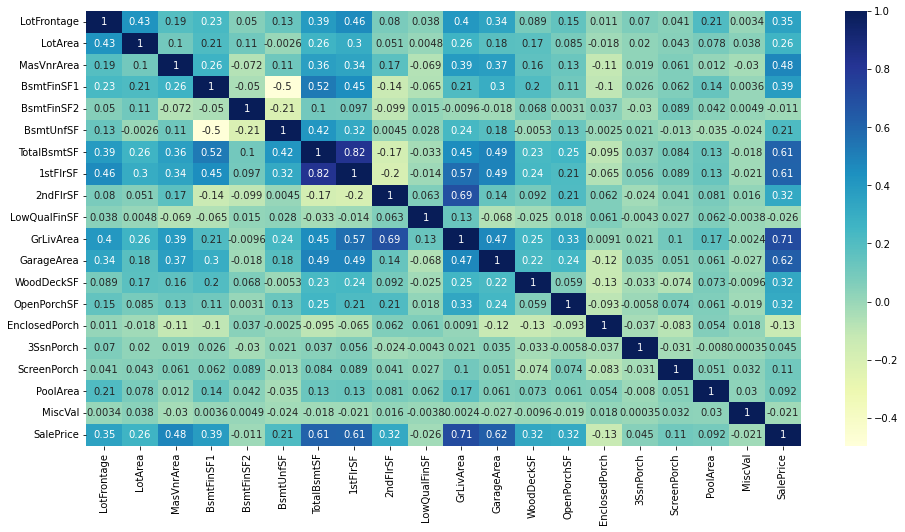

In [486]:
# Visualizing correlations in the numeric data - using heatmap
# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

Correlation of SalePrice with independent variables
1) SalePrice is in high positive correlation with TotalBsmtSF, 1stFlrSF, GrLivArea, GarageArea.

2) SalePrice is in slight negative correlation with EnclosedPorch.

Correlation among independent variables
1) High positive correlation is seen amongst - TotalBsmtSF & 1stFlrSF, GrLivArea & 2ndFlrSF, GrLivArea & 1stFlrSF

#### 3. Handling the missing values

In [487]:
#Listing out missing value columns
null_values = (data[data.columns[data.isna().any()]].isna().sum() / 1460) * 100

In [488]:
null_values

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

##### 3.1 Fence attribute

In [489]:
# Checking Fence "Attribute"
data['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [490]:
#according to data defination of 'Fence' - N.a. means there is no fence, hence replacing n.a. values with 'NoFence'
data['Fence'].fillna('NoFence', inplace = True)

In [491]:
#checking after populating the column 'Fence'
data['Fence'].value_counts()

NoFence    1179
MnPrv       157
GdPrv        59
GdWo         54
MnWw         11
Name: Fence, dtype: int64

##### 3.2 Fireplace quality

In [492]:
#Inspecting 'Fireplacequ' with 'FirePlaces'
data['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [493]:
data['Fireplaces'].value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

In [494]:
data[(data['Fireplaces'] == 0) & (data['FireplaceQu'].isna())].shape

(690, 81)

###### From the above analyses we can conclude that the rows where 'FireplaceQu' is n.a are exactly the same rows where 'Fireplaces' is 0. Since 'Fireplaces' feature does not have any n.a. values then filling corresponding n.a. rows with 'NF' (No Fireplace) of 'FireplaceQu' is legitimate.

In [495]:
#filling n.a. values of 'FireplaceQu' with 'NF'

In [496]:
data['FireplaceQu'].fillna('NF',inplace = True)

In [497]:
data['FireplaceQu'].value_counts()

NF    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

##### 3.3 Pool

In [498]:
# 'PoolArea' attribute in the given dataset is complete hence we inspect it with the 'PoolQC'
data[data['PoolArea']==0].shape

(1453, 81)

In [499]:
# number of data missing in 'PoolQC'

In [500]:
data[data['PoolQC'].isna()].shape

(1453, 81)

In [501]:
# verifying that 'PoolQC' is n.a. where 'PoolArea' is 0
data[(data['PoolArea'] == 0) & (data['PoolQC'].isna())].shape

(1453, 81)

###### Since the rows where 'PoolArea' is 0, are also the same rows where 'PoolQC' values are missing . Therefore filling the column 'PoolQC' with 'NP'  (No Pool).

In [502]:
#filling 'PoolQC' n.a. values with 'NP'
data['PoolQC'].fillna('NP', inplace = True)

In [503]:
data['PoolQC'].value_counts()

NP    1453
Gd       3
Ex       2
Fa       2
Name: PoolQC, dtype: int64

##### 3.4 Miscellaneous feature

In [504]:
# 'MiscVal' attribute in the given dataset is complete hence we inspect it with the 'MiscFeature'
data[data['MiscVal'] == 0].shape

(1408, 81)

In [505]:
data[data['MiscFeature'].isna()].shape

(1406, 81)

In [506]:
# inspecting the columns
data[(data['MiscVal'] == 0) & ~(data['MiscFeature'].isna())][["MiscVal","MiscFeature"]]

,MiscVal,MiscFeature
873,0,Othr
1200,0,Shed


###### Some of the miscellaneous features are given no price amount. so we can replace all n.a. miscellaneous with 'NM' (No Miscellaneous feature).

In [507]:
data['MiscFeature'].fillna("NM", inplace = True)

In [508]:
data['MiscFeature'].value_counts()

NM      1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

##### 3.5 Alley

In [509]:
data['Alley'].isna().sum()

1369

###### Since NA here means no alley access therefore, changing the NA fields to a string 'NAl'

In [510]:
data['Alley'].fillna('NAl', inplace = True)

In [511]:
data['Alley'].value_counts()

NAl     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

###### 3.6 Garage related features - GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond

In [512]:
data['GarageType'].isna().sum()

81

In [513]:
data['GarageYrBlt'].isna().sum()

81

In [514]:
data[data['GarageYrBlt'].isna()]['GarageYrBlt']

39     NaN
48     NaN
78     NaN
88     NaN
89     NaN
99     NaN
108    NaN
125    NaN
127    NaN
140    NaN
148    NaN
155    NaN
163    NaN
165    NaN
198    NaN
210    NaN
241    NaN
250    NaN
287    NaN
291    NaN
307    NaN
375    NaN
386    NaN
393    NaN
431    NaN
434    NaN
441    NaN
464    NaN
495    NaN
520    NaN
528    NaN
533    NaN
535    NaN
562    NaN
582    NaN
613    NaN
614    NaN
620    NaN
635    NaN
636    NaN
638    NaN
649    NaN
705    NaN
710    NaN
738    NaN
750    NaN
784    NaN
826    NaN
843    NaN
921    NaN
942    NaN
954    NaN
960    NaN
968    NaN
970    NaN
976    NaN
1009   NaN
1011   NaN
1030   NaN
1038   NaN
1096   NaN
1123   NaN
1131   NaN
1137   NaN
1143   NaN
1173   NaN
1179   NaN
1218   NaN
1219   NaN
1234   NaN
1257   NaN
1283   NaN
1323   NaN
1325   NaN
1326   NaN
1337   NaN
1349   NaN
1407   NaN
1449   NaN
1450   NaN
1453   NaN
Name: GarageYrBlt, dtype: float64

In [515]:
data['GarageFinish'].isna().sum()

81

In [516]:
data['GarageQual'].isna().sum()

81

In [517]:
data['GarageCond'].isna().sum()

81

In [518]:
# Checking the garageArea, garageCars with respect to other corresponding garage attribute rows
data[(data['GarageType'].isna()) & (data['GarageYrBlt'].isna()) & (data['GarageFinish'].isna()) & (data['GarageCond'].isna()) & (data['GarageQual'].isna())][['GarageArea','GarageCars']]

,GarageArea,GarageCars
39,0,0
48,0,0
78,0,0
88,0,0
89,0,0
99,0,0
108,0,0
125,0,0
127,0,0
140,0,0


###### since the number of rows missing are same for all the properties which donot have a garage, therefore we can fill the missing values of this categorical Garage variables with 'NG' (No Garage)

In [519]:
data.fillna({'GarageType': 'NG','GarageFinish': 'NG','GarageFinish': 'NG','GarageCond': 'NG','GarageQual':'NG'}, inplace = True)

In [520]:
data[['GarageType','GarageFinish','GarageFinish','GarageCond']].isna().sum()

GarageType      0
GarageFinish    0
GarageFinish    0
GarageCond      0
dtype: int64

In [521]:
data['GarageYrBlt'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: GarageYrBlt
Non-Null Count  Dtype  
--------------  -----  
1379 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


###### since garageYrblt is float type we replace the year with the minimum value of the 'GarageYrblt' column

In [522]:
data['GarageYrBlt'].fillna(data['GarageYrBlt'].min(), inplace = True)

In [523]:
data['GarageYrBlt'].isna().sum()

0

##### 3.7 LotFrontage

In [524]:
data['LotFrontage'].isna().sum()

259

In [525]:
data['LotFrontage']

0        65.0
1        80.0
2        68.0
3        60.0
4        84.0
5        85.0
6        75.0
7         NaN
8        51.0
9        50.0
10       70.0
11       85.0
12        NaN
13       91.0
14        NaN
15       51.0
16        NaN
17       72.0
18       66.0
19       70.0
20      101.0
21       57.0
22       75.0
23       44.0
24        NaN
25      110.0
26       60.0
27       98.0
28       47.0
29       60.0
30       50.0
31        NaN
32       85.0
33       70.0
34       60.0
35      108.0
36      112.0
37       74.0
38       68.0
39       65.0
40       84.0
41      115.0
42        NaN
43        NaN
44       70.0
45       61.0
46       48.0
47       84.0
48       33.0
49       66.0
50        NaN
51       52.0
52      110.0
53       68.0
54       60.0
55      100.0
56       24.0
57       89.0
58       66.0
59       60.0
60       63.0
61       60.0
62       44.0
63       50.0
64        NaN
65       76.0
66        NaN
67       72.0
68       47.0
69       81.0
70       95.0
71    

<AxesSubplot:>

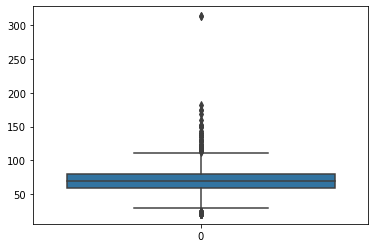

In [526]:
sns.boxplot(data = data['LotFrontage'])

In [527]:
# Filling the missing values with mode values LotFrontage
data['LotFrontage'].fillna(data['LotFrontage'].mode().iloc[0], inplace = True)

In [528]:
data['LotFrontage'].isna().sum()

0

##### 3.8 MasVnrArea and MasVnrType 

In [529]:
data['MasVnrArea'].isna().sum()

8

In [530]:
data['MasVnrType'].isna().sum()

8

In [531]:
data[(data['MasVnrArea'].isna()) & (data['MasVnrType'].isna())][['MasVnrArea','MasVnrType']]

,MasVnrArea,MasVnrType
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


In [532]:
data['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

<AxesSubplot:>

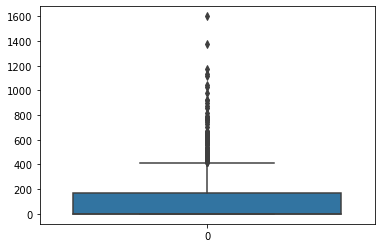

In [533]:
sns.boxplot(data = data['MasVnrArea'])

###### Thererfore from the anallyses we come to know that wherever MasVnrArea is N.a. the MasVnrType is N.a. .Hence MasVnrArea will be replaced with N.a. and MasVnrType will be replaced with None.

In [534]:
data['MasVnrArea'].fillna(0, inplace = True)

In [535]:
data['MasVnrArea'].isna().sum()

0

In [536]:
data['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [537]:
data['MasVnrType'].fillna('None', inplace = True)

In [538]:
data['MasVnrType'].value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

##### 3.9 Basement features -  BsmtQual     BsmtCond         BsmtExposure     BsmtFinType1     BsmtFinType2   

In [539]:
data['BsmtQual'].isna().sum()

37

In [540]:
data['BsmtCond'].isna().sum()

37

In [541]:
data['BsmtExposure'].isna().sum()

38

In [542]:
data['BsmtFinType1'].isna().sum()

37

In [543]:
data['BsmtFinType2'].isna().sum()

38

In [544]:
data[(data['BsmtQual'].isna() & (data['BsmtCond'].isna()) & (data['BsmtFinType1'].isna().sum()))].shape

(37, 81)

In [545]:
data[(data['BsmtExposure'].isna()) & (data['BsmtFinType2'].isna())].shape

(37, 81)

In [546]:
data.fillna({'BsmtQual': 'NoBa','BsmtCond': 'NoBa','BsmtExposure': 'NoBa','BsmtFinType1': 0,'BsmtFinType2': 0}, inplace = True)

In [547]:
data['BsmtFinType2'].isna().sum()

0

##### 3.10 Electrical

In [548]:
data['Electrical'].isna().sum()

1

In [549]:
data['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

###### Since most of the category is SBrkr, then we replace the one missing value with 'SBrkr'

In [550]:
data['Electrical'].fillna('SBrkr', inplace = True)

In [551]:
data['Electrical'].value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [552]:
#checking collumns if all null values are replaced

In [553]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

##### 4 . Data Preparation

In [554]:
# Converting dtypes of categorical variables to 'object' type
data[['MSSubClass', 'OverallQual', 'OverallCond']] = data[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')

In [555]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

In [556]:
# Merging MoSold and YrSold columns into one - DateSold
data['DateSold'] = data['YrSold'].astype('str') + "-" +data['MoSold'].astype('str')
data['DateSold'] = pd.to_datetime(data['DateSold']).map(pd.Timestamp.timestamp).astype('int')
data['DateSold']

0       1201824000
1       1177977600
2       1220227200
3       1138752000
4       1228089600
5       1254355200
6       1185926400
7       1257033600
8       1207008000
9       1199145600
10      1201824000
11      1151712000
12      1220227200
13      1185926400
14      1209600000
15      1183248000
16      1267401600
17      1159660800
18      1212278400
19      1241136000
20      1162339200
21      1180656000
22      1220227200
23      1180656000
24      1272672000
25      1246406400
26      1272672000
27      1272672000
28      1164931200
29      1209600000
30      1214870400
31      1212278400
32      1199145600
33      1270080000
34      1185926400
35      1157068800
36      1243814400
37      1254355200
38      1262304000
39      1212278400
40      1164931200
41      1183248000
42      1196467200
43      1214870400
44      1146441600
45      1264982400
46      1249084800
47      1183248000
48      1243814400
49      1167609600
50      1183248000
51      1157068800
52      1272

In [557]:
# Extracting the response variable
resp = data.loc[:,'SalePrice']
resp

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
30       40000
31      149350
32      179900
33      165500
34      277500
35      309000
36      145000
37      153000
38      109000
39       82000
40      160000
41      170000
42      144000
43      130250
44      141000
45      319900
46      239686
47      249700
48      113000
49      127000
50      177000
51      114500
52      110000
53      385000
54      130000
55      180500
56      172500
57      196500
58      438780
59      124900
60      158000
61      101000
62      202500
63      140000
64      219500
65      317000
66      18

In [558]:
# dropping the MoSold,YrSold, SalePrice so that we can split predictor and response variables
data.drop(['Id', 'MoSold', 'YrSold','SalePrice'], axis =1, inplace = True)

In [559]:
col_list = data.columns

In [560]:
# Split into X and y
X = data.loc[:,col_list]
y = resp
y

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
30       40000
31      149350
32      179900
33      165500
34      277500
35      309000
36      145000
37      153000
38      109000
39       82000
40      160000
41      170000
42      144000
43      130250
44      141000
45      319900
46      239686
47      249700
48      113000
49      127000
50      177000
51      114500
52      110000
53      385000
54      130000
55      180500
56      172500
57      196500
58      438780
59      124900
60      158000
61      101000
62      202500
63      140000
64      219500
65      317000
66      18

In [561]:
# Creating dummy variables for categorical variables
data_categ = X.select_dtypes(include = ['object'])
data_categ.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,NAl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,NP,NoFence,NM,WD,Normal
1,20,RL,Pave,NAl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,Attchd,RFn,TA,TA,Y,NP,NoFence,NM,WD,Normal
2,60,RL,Pave,NAl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,NP,NoFence,NM,WD,Normal
3,70,RL,Pave,NAl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Detchd,Unf,TA,TA,Y,NP,NoFence,NM,WD,Abnorml
4,60,RL,Pave,NAl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,Attchd,RFn,TA,TA,Y,NP,NoFence,NM,WD,Normal


In [562]:
# Converting to dummy variables (one hot encoding)

data_dummy = pd.get_dummies(data_categ, drop_first=True)
data_dummy.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [563]:
# dropping the categorical variables
X = X.drop(list(data_categ.columns), axis =1)

In [564]:
# concat dummy variables with X
X = pd.concat([X, data_dummy], axis = 1)

In [565]:
# Feature scaling of X
from sklearn.preprocessing import scale

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols

In [566]:
# Feature scaling of y
y = pd.Series(scale(y))

In [567]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=42)

##### 5. Linear Regression Model Building

In [568]:
# Initialising linear regression model
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [569]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

66683764.702310055
[ 1.02267143e-02  8.37364609e-02  1.48904678e-01  3.44545914e-02
  3.75770156e-02  4.58596395e+08  1.62202909e+08  4.44287307e+08
 -4.41108358e+08 -1.38253750e+10 -1.56113832e+10 -1.73888685e+09
  1.87925343e+10  3.16268094e-02  5.82892448e-03  3.07055917e-02
  1.08531928e-02 -2.97305919e-02 -2.48858295e-02  4.81578670e-02
  2.82514393e-02 -2.26191580e-02  1.49341282e-02  8.89313221e-02
  1.98146477e-02 -4.56747413e-03  1.68241151e-02  2.13661715e-02
  3.64729762e-02  3.03273918e+00  4.23942003e-02 -2.36756820e-03
  3.10811028e-03 -6.80573285e-03  8.20812583e-03  3.15124718e-02
  3.55570912e-02  3.63720469e-02  3.93335149e-02 -2.43040845e-02
 -1.81953646e-02  8.45649615e+08  1.48827985e+10  1.27749199e+10
  5.18529785e+09  6.83483258e-02  7.14325830e-02  1.76628195e-02
  8.89108181e-02  9.35390890e-02  2.05633789e-02 -5.33109903e-03
  2.91227847e-02  1.23925060e-02  1.00811347e-02  8.40775482e-03
  3.44727673e-02 -6.97784126e-03  2.93597579e-02 -1.58168273e-02
  3.04

In [570]:
from sklearn.metrics import r2_score, mean_squared_error

In [571]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

0.9453765822058895


In [572]:
r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

-5.3710211492658864e+19


In [573]:
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

53.273523832119494


In [574]:
rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

2.602912089883606e+22


In [575]:
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

0.05217779023713957


In [576]:
mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

5.942721666400927e+19


##### 5.1 Running RFE to fing best five features responsible for predicting the SalePrice

### 6. Ridge regression

In [577]:
# declaring a list of alphas for hyperparameter tuning
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 
                    3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()
# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'neg_mean_absolute_error',  
                        cv = folds,  return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [578]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [579]:
#Fitting Ridge model for alpha = 500 and displaying coefficients which are penalised
alpha = 500
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 2.03517471e-03  3.70873506e-02  2.93801886e-02  3.38388912e-02
  3.73164347e-02  3.29141121e-02  5.21755373e-03  5.45963414e-03
  4.16365760e-02  5.70634781e-02  5.00291937e-02 -6.13696621e-04
  8.34843091e-02  2.68597190e-02 -6.67913788e-03  4.92202952e-02
  2.47204754e-02  6.90555116e-03 -2.48676959e-02  6.02536428e-02
  3.57233335e-02  1.67017650e-02  5.72014186e-02  4.46124471e-02
  2.68737032e-02  6.45759082e-03 -7.27383760e-04  1.67211462e-02
  2.81436219e-02  3.37862661e-02 -7.78109155e-04  1.13557889e-03
 -1.29893073e-02  6.78769570e-03  1.84868078e-03  4.54902224e-03
  1.07367733e-02  1.00832307e-02  6.08800624e-03 -6.67302294e-03
 -6.35878289e-03 -1.48685402e-02 -2.10731959e-02 -2.46261227e-02
 -7.31417333e-03 -1.00793887e-02  1.18413262e-02  5.58686501e-04
  1.18544009e-02 -1.38963138e-02  9.06053319e-03  6.57552094e-05
  1.32251202e-02  1.52042426e-02 -1.81264806e-02 -6.81689654e-03
  3.08096713e-02  2.14415851e-04  1.51318160e-02 -1.11549451e-02
  2.83141506e-02 -1.08046

In [580]:
# calculating R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

0.8958927721121014


In [581]:
r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

0.8712727955038525


In [582]:
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

101.5344537188563


In [583]:
rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

62.383965277392086


In [584]:
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

0.09944608591464868


In [585]:
mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.1424291444689317


In [586]:
y_residual = y_test - y_pred_test

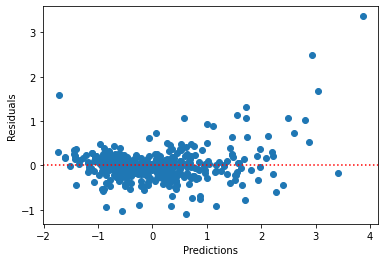

In [587]:
plt.scatter(y_pred_test,y_residual)
plt.axhline(y=0, color = 'r', linestyle = ':')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.show()

##### From the above plot we can conclude that the residuals are evenly spread across 0 axis and they donot have any significant pattern

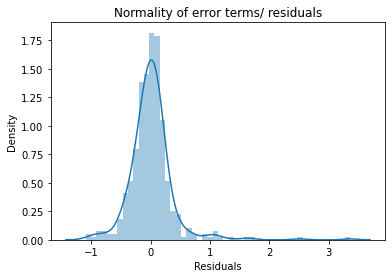

In [588]:
# Distribution of errors
p = sns.distplot(y_residual, kde =True)
p = plt.title("Normality of error terms/ residuals")
plt.xlabel('Residuals')
plt.show()

### 7. Lasso Regression

In [589]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [590]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.01}


In [591]:
#Fitting Ridge model for alpha = 500 and displaying coefficients which are penalised

alpha =0.01
lasso = Lasso(alpha=alpha)     
lasso.fit(X_train, y_train) 

Lasso(alpha=0.01)

In [592]:
lasso.coef_

array([-6.18865736e-03,  3.88720302e-02,  9.53402485e-02,  3.78540474e-02,
        2.13154371e-02,  2.65975655e-02,  0.00000000e+00, -0.00000000e+00,
        2.97469952e-02,  0.00000000e+00,  0.00000000e+00, -1.36090736e-02,
        2.83579831e-01,  3.49411905e-02, -0.00000000e+00,  3.26254236e-02,
        7.88813546e-04, -0.00000000e+00, -5.10682847e-02,  3.43346465e-02,
        3.22339648e-02,  0.00000000e+00,  9.14518507e-02,  6.18610409e-03,
        2.11116501e-02,  0.00000000e+00, -0.00000000e+00,  1.33079988e-02,
        3.02932977e-02,  8.53012430e-02, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -1.82865790e-02, -0.00000000e+00, -1.20072258e-02,
       -0.00000000e+00, -0.00000000e+00,  5.59069421e-03, -0.00000000e+00,
        0.00000000e+00, -8.31724096e-03,  2.37115574e-03, -0.00000000e+00,
        7.13856382e-03,  

In [593]:
# calculating R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

0.9063634409458224


In [594]:
r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

0.8673597239384669


In [595]:
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

91.32254373266699


In [596]:
rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

64.28032371707425


In [597]:
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

0.08944421521319


In [598]:
mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.14675872994765812


In [599]:
# Checking Lasso regressions residual analyses

In [600]:
y_test_res = y_test - y_pred_test

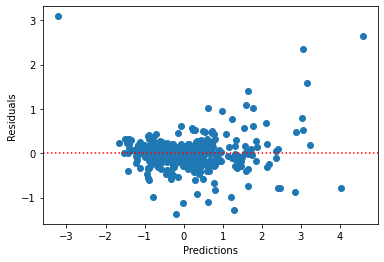

In [601]:
plt.scatter(y_pred_test,y_test_res)
plt.axhline(y=0, color = 'r', linestyle = ':')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.show()

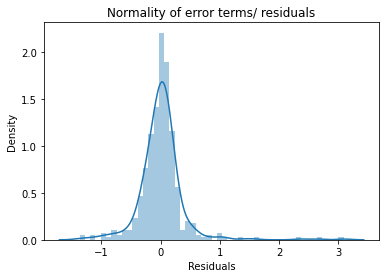

In [602]:
# Distribution of errors
p = sns.distplot(y_test_res, kde =True)
p = plt.title("Normality of error terms/ residuals")
plt.xlabel('Residuals')
plt.show()

In [603]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)','MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric}

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

In [604]:
ridge_metric = pd.Series(metric2, name = 'Ridge Regression')
lasso_metric = pd.Series(metric3, name = 'Lasso Regression')
final_metric = pd.concat([lr_metric, ridge_metric, lasso_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.453766e-01,0.895893,0.906363
1,R2 Score (Test),-5.371021e+19,0.871273,0.867360
2,RSS (Train),5.327352e+01,101.534454,91.322544
3,RSS (Test),2.602912e+22,62.383965,64.280324
4,MSE (Train),2.284246e-01,0.315351,0.299072
5,MSE (Test),7.708905e+09,0.377398,0.383091


### Coefficients after regularization

In [605]:
betas = pd.DataFrame(index=X.columns)

In [606]:
betas.rows = X.columns

In [607]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [608]:
pd.set_option('display.max_rows', None)
betas.head(250)

,Linear,Ridge,Lasso
LotFrontage,1.022671e-02,2.035175e-03,-0.006189
LotArea,8.373646e-02,3.708735e-02,0.038872
YearBuilt,1.489047e-01,2.938019e-02,0.095340
YearRemodAdd,3.445459e-02,3.383889e-02,0.037854
MasVnrArea,3.757702e-02,3.731643e-02,0.021315
BsmtFinSF1,4.585964e+08,3.291411e-02,0.026598
BsmtFinSF2,1.622029e+08,5.217554e-03,0.000000
BsmtUnfSF,4.442873e+08,5.459634e-03,-0.000000
TotalBsmtSF,-4.411084e+08,4.163658e-02,0.029747
1stFlrSF,-1.382537e+10,5.706348e-02,0.000000


In [609]:
selected_feat = betas.index[betas['Lasso'] != 0]
selected_feat

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath',
       ...
       'FireplaceQu_NF', 'GarageQual_Gd', 'GarageCond_Gd', 'PoolQC_Gd',
       'MiscFeature_TenC', 'SaleType_Con', 'SaleType_New',
       'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Partial'],
      dtype='object', length=113)

##### From the above analyses we will select Lasso regression as the optimal method over Ridge and linear regression as the R2 is 0.90 for training data and 0.87 for test data. which is slightly higher than Ridge regression.
##### Also, Lasso regression helps in feature selection, we will use only features that are non zero as determined in Lasso regression and manipulate essential features.

In [610]:
# using RFE to select top 5 features
from sklearn.feature_selection import RFE

In [611]:
rfe = RFE(lasso,5)
rfe.fit(X_train, y_train)

RFE(estimator=Lasso(alpha=0.01), n_features_to_select=5)

In [612]:
col = X_train.columns[rfe.support_]
col

Index(['YearBuilt', 'GrLivArea', 'GarageCars', 'OverallQual_8',
       'OverallQual_9'],
      dtype='object')

###### The 5 important features are 'YearBuilt', 'GrLivArea', 'OverallQual_8', 'OverallQual_9', 'OverallQual_10'

##### Misc: to identify most important predictor variables if the previously analysed ones are not there.


In [613]:
# drop 'YearBuilt', 'GrLivArea', 'GarageCars', 'OverallQual_8','OverallQual_9' features

In [614]:
X_train.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=286)

In [615]:
X_train.drop(['YearBuilt', 'GrLivArea', 'GarageCars', 'OverallQual_8','OverallQual_9'], axis =1, inplace =True)

In [616]:
X_train.columns

Index(['LotFrontage', 'LotArea', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=281)

In [617]:
#Using lasso regression
lasso2 = Lasso()

# cross validation
model_cv2 = GridSearchCV(estimator = lasso2, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv2.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [618]:
# Printing the best hyperparameter alpha
print(model_cv2.best_params_)

{'alpha': 0.001}


In [619]:
alpha =0.001
lasso = Lasso(alpha=alpha)     
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [620]:
rfe2 = RFE(lasso2,5)
rfe2.fit(X_train, y_train)

RFE(estimator=Lasso(), n_features_to_select=5)

In [621]:
col_new = X_train.columns[rfe2.support_]
col_new

Index(['SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial'],
      dtype='object')